# <center>**- SES 722 : TP n°2 Économétrie -**</center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Exercice 1 :**
Définir la variable dépendante `y = wage`. La matrice de variable explicative inclut une constante et les variables *educ, exper,tenure*.

In [2]:
df = pd.read_csv('textfiles/WAGE1.raw', delim_whitespace=True, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [5]:
wage = df[0]
y = wage

df['const'] = 1 # on créé une colonne de 1 dans le df
X = pd.concat([df['const'], df[1], df[2], df[3]], axis=1)
X.columns = ['const', 'educ', 'exper', 'tenure'] # on renomme les colonnes
df.drop('const', axis=1) # on enlève la colonne de 1 du df

X.head()

,const,educ,exper,tenure
0,1,11,2,0
1,1,12,22,2
2,1,11,2,0
3,1,8,44,28
4,1,12,7,2


In [6]:
round(X.describe(),2)

,const,educ,exper,tenure
count,526.0,526.00,526.00,526.00
mean,1.0,12.56,17.02,5.10
std,0.0,2.77,13.57,7.22
min,1.0,0.00,1.00,0.00
25%,1.0,12.00,5.00,0.00
50%,1.0,12.00,13.50,2.00
75%,1.0,14.00,26.00,7.00
max,1.0,18.00,51.00,44.00


## **Exercice 2 :**
Calculer les estimateurs des moindres carrées ordinaires.

In [7]:
beta = np.linalg.inv(X.T @ X)@X.T@y #@ permet de faire un produit matriciel comme matmul
beta

0   -2.872735
1    0.598965
2    0.022340
3    0.169269
dtype: float64

## **Exercice 3 :**
Calculer la matrice de variance-covariance des estimateurs OLS, puis, calculer les écart-types.

In [8]:
beta = beta.values #pour avoir une série numpy

u = y-X@beta
n,k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2*np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))
std

array([0.72896429, 0.05128355, 0.01205685, 0.02164461])

## **Exercice 4 :**
Faire l’histogramme des erreurs. Supprimer les observations pour lesquelles l’erreur est situéé à plus de trois écart-types de la moyenne. Refaire l’estimation.

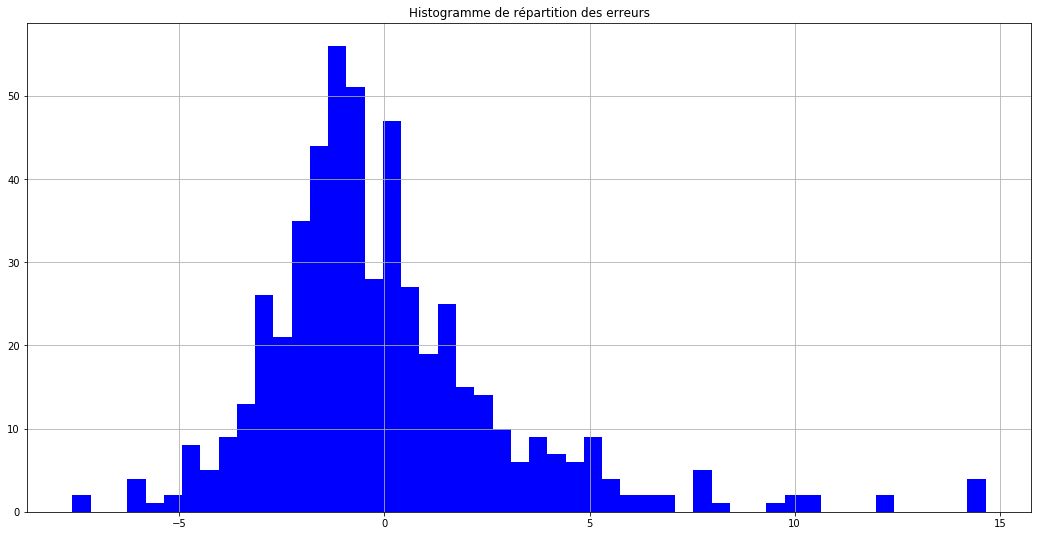

In [9]:
plt.figure(figsize=(18,9))
plt.hist(u, bins=50, color='blue')
plt.title('Histogramme de répartition des erreurs')
plt.grid(True)
plt.show()

In [10]:
u.std() #écart type de u

3.075650201923496

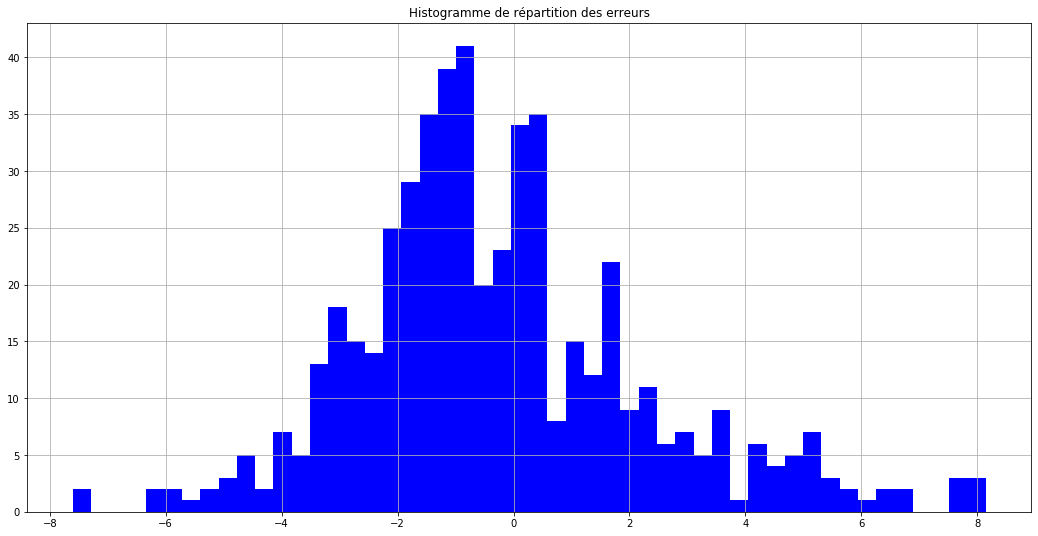

In [11]:
plt.figure(figsize=(18,9))
plt.hist(u[abs(u)<(3*u.std())], bins=50, color='blue') #On supprime les observations pour lesquelles l’erreur est situéé à plus de trois écart-types de la moyenne.
plt.title('Histogramme de répartition des erreurs')
plt.grid(True)
plt.show()

In [12]:
# On refait l'estimation avec les nouvelles valeurs de y et X, c'est-à-dire en ayant enlevé les valeurs extrêmes.
y = y[abs(u)<(u.mean()+3*u.std())]
X = X[abs(u)<(u.mean()+3*u.std())]

beta = np.linalg.inv(X.T @ X)@X.T@y #@ permet de faire un produit matriciel comme matmul
beta = beta.values

u = y- X@beta
n,k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2*np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))
std

array([0.60354083, 0.04265934, 0.00987607, 0.01796621])

## **Exercice 5 :**
Tester l’hypothèse de non significativité de `exper`, avec une hypothèse alternative des deux côtés à 5% :

$H_0 : β_{exper} = 0$

Calculer le seuil critique de rejet ainsi que la p-value.

In [13]:
from scipy.stats import t

dl = len(y) - 4 # degré de liberté = nb d'observations - nb de variables
t.ppf(0.975,dl) # seuil à 5% de chaque côté donc à 95% soit 0.975 pour les deux côtés. C'est donc le seuil à 95% ou 97.5% des deux côtés.

1.9646172223303828

In [14]:
# Pour avoir la student
beta[2]/std[2]

1.7788778955907392

In [15]:
beta[2]

0.01756832978154568

In [16]:
t.sf(beta[2]/std[2],dl)*2 # permet d'avoir les aires des deux côtés

0.07585416697773334

> On ne rejette pas l’hypothèse $H_0$ à 5%.

## **Exercice 6 :**
Faire le même test en utilisant la bibliothèque `statsmodels`.

In [17]:
import statsmodels.api as sm

model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     78.11
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           1.33e-41
Time:                        16:17:44   Log-Likelihood:                -1204.4
No. Observations:                 515   AIC:                             2417.
Df Residuals:                     511   BIC:                             2434.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7009      0.604     -2.818      0.0

## **Exercice 7 :**
Refaire l’exercice 5 avec $y=log(wage)$ (avec le même échantillon qu’en 2-5).

In [18]:
# On refait l'estimation avec les nouvelles valeurs de y et X, c'est-à-dire en ayant enlevé les valeurs extrêmes.
y_log = np.log(y)

beta = np.linalg.inv(X.T @ X)@X.T@y_log #@ permet de faire un produit matriciel comme matmul
beta = beta.values

u = y_log - X@beta
n,k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2*np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))
std

array([0.09997212, 0.00706621, 0.0016359 , 0.00297597])

In [19]:
dl = len(y_log) - 4 # degré de liberté = nb d'observations - nb de variables
t.ppf(0.975,dl) # seuil à 5% de chaque côté donc à 95% soit 0.975 pour les deux côtés. C'est donc le seuil à 95% ou 97.5% des deux côtés.

1.9646172223303828

In [20]:
# Pour avoir la student
beta[2]/std[2]

2.2412779619145464

In [21]:
t.sf(beta[2]/std[2],dl)*2 # permet d'avoir les aires des deux côtés

0.025436638860709498

> Cette fois, on rejette l’hypothèse $H_0$

## **Exercice 8 :**
Tester l'hypothèse $H_0 : β_{educ} = 0.6$

In [22]:
beta = np.linalg.inv(X.T @ X)@X.T@y #@ permet de faire un produit matriciel comme matmul
beta = beta.values

u = y - X@beta
n,k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2*np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))
std

array([0.60354083, 0.04265934, 0.00987607, 0.01796621])

In [23]:
(beta[1]-0.6)/std[1]

-2.329221511737774

In [26]:
(1.0-t.sf((beta[1]-0.6)/std[1],dl))*2

0.020236207568022024

> La p-value est à 2% donc on rejette l'hypothèse à 5% puisque la p-value est trop faible.

## **Exercice 9 :**
Tester l’hypothèse : $H_0 : β_{educ} = β_{exper}$